In [1036]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

In [1038]:
Data = pd.read_csv("./EV_Prices/dataset.csv")
Data.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [1039]:
Data.shape

(91713, 85)

In [1040]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

# Missing and Unique Values
> - `Missing Values` In the dataset, most of the variables have missing values. The percentage of missing values in these variable are less than 20% and also there's one variable which indicates missing values almost close to 100%.
> - `Unique Values` There aren't much variable with unique values.

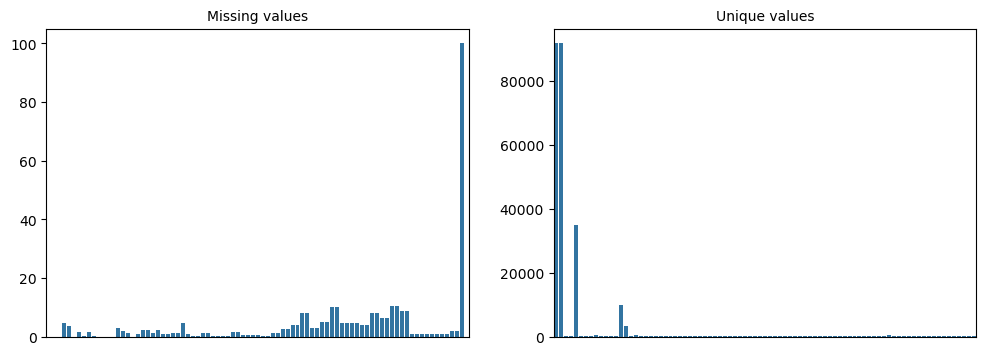

In [1041]:
null_data = {}
unique_values = {}

for column in Data.columns:
    null_data[column] = round(Data[column].isnull().sum() / len(Data) * 100, 2)
    unique_values[column] = len(Data[column].unique())

fig, ax = plt.subplots(1,2, figsize=(12,4))

sb.barplot(x = null_data.keys(), y = null_data.values(), data = null_data, ax=ax[0])
sb.barplot(x = unique_values.keys(), y = unique_values.values(), data = null_data, ax=ax[1])

ax[0].set_title("Missing values", fontsize=10)
ax[1].set_title("Unique values", fontsize=10)
ax[0].set_xticks([])
ax[1].set_xticks([])

plt.show()

In [1042]:
Data_c = Data.copy()

# Overview of variables
There are 80 different variables that make up our data. To understand all of them they are divided into different categories.

### 1. Demographics and Physical Characteristics
> - `age` The patient’s age in years.
> - `bmi` Body Mass Index, calculated as weight (kg) / height (m²). It is a measure of body fat.
> - `ethnicity` The patient’s ethnicity (e.g., Caucasian, African-American, etc.).
> - `gender` The patient’s gender (e.g., Male, Female, Other).
> - `height` The patient’s height in centimeters.
> - `weight` The patient’s weight in kilograms.

### 2. Surgical and Admission Information
> - `elective_surgery` Whether the patient’s surgery was elective (1 for yes, 0 for no).
> - `icu_admit_source` The source of the patient’s ICU admission (e.g., emergency department, hospital ward, operating room).
> - `icu_stay_type` The type of ICU stay (e.g., first ICU stay, readmission).
> - `icu_type` The type of ICU the patient was admitted to (e.g., medical ICU, surgical ICU).
> - `pre_icu_los_days` Length of stay in the hospital (in days) before ICU admission.

### 3. APACHE Scoring System

The APACHE (Acute Physiology and Chronic Health Evaluation) system is widely used to assess the severity of disease for ICU patients.
> - `apache_2_diagnosis` Diagnosis code used in the APACHE II scoring system.
> - `apache_3j_diagnosis` Diagnosis code used in the APACHE III-J scoring system.
> - `apache_post_operative` Indicates if the patient had surgery before ICU admission (1 for yes, 0 for no).
> - `arf_apache` Indicates if the patient had Acute Renal Failure as part of the APACHE assessment.
> - `gcs_eyes_apache` Glasgow Coma Scale (GCS) score for eye response (used in APACHE calculation).
> - `gcs_motor_apache` GCS score for motor response.
> - `gcs_unable_apache` Whether GCS scoring was unable to be completed for the patient.
> - `gcs_verbal_apache` GCS score for verbal response.
> - `heart_rate_apache` Heart rate used in the APACHE calculation.
> - `intubated_apache` Whether the patient was intubated (1 for yes, 0 for no).
> - `map_apache` Mean Arterial Pressure (MAP) used in the APACHE calculation.
> - `resprate_apache` Respiratory rate used in the APACHE calculation.
> - `temp_apache` Body temperature used in the APACHE calculation.
> - `ventilated_apache` Whether the patient was mechanically ventilated (1 for yes, 0 for no).
> - `apache_4a_hospital_death_prob` Predicted probability of in-hospital death based on APACHE IV.
> - `apache_4a_icu_death_prob` Predicted probability of ICU death based on APACHE IV.

### 4. Vitals (Day 1 and Hour 1 Measurements)

Day 1 (d1_) and Hour 1 (h1_) metrics refer to measurements taken during the first 24 hours or first hour of ICU stay, respectively. These metrics are further split into:

> - `_max` Maximum value recorded.
> - `_min` Minimum value recorded.
> - `_noninvasive` Values measured using noninvasive methods.

Key vitals:

> - `diasbp` Diastolic Blood Pressure.
> - `heartrate` Heart rate (beats per minute).
> - `mbp` Mean Blood Pressure.
> - `resprate` Respiratory rate (breaths per minute).
> - `spo2` Oxygen saturation (%).
> - `sysbp` Systolic Blood Pressure.
> - `temp` Body temperature (°C).
> - `glucose` Blood glucose level (mg/dL).
> - `potassium` Blood potassium level (mEq/L).

Example:

> - `d1_heartrate_max` The highest heart rate recorded during the first 24 hours of ICU stay.
> - `h1_temp_min` The lowest temperature recorded during the first hour of ICU stay.

### 5. Chronic Health Conditions

Binary indicators for chronic health conditions:

> - `aids` HIV/AIDS status (1 for yes, 0 for no).
> - `cirrhosis` Liver cirrhosis status.
> - `diabetes_mellitus` Diabetes status.
> - `hepatic_failure` Liver failure status.
> - `immunosuppression` Immunosuppression status (e.g., due to medications or conditions).
> - `leukemia` Leukemia status.
> - `lymphoma` Lymphoma status.
> - `solid_tumor_with_metastasis` Presence of a metastatic solid tumor.Chronic Health Conditions

### 6. Bodysystem Diagnoses

> - `apache_3j_bodysystem` The primary affected body system based on APACHE III-J scoring (e.g., cardiovascular, respiratory, etc.).
> - `apache_2_bodysystem` The primary affected body system based on APACHE II scoring.

### 7. Outcome

> - `hospital_death` Indicates whether the patient died during the hospital stay (1 for yes, 0 for no).

# Irrelavant variables

- **`height` and `weight`**: Dropped because they are redundant if BMI is already included and may have missing values.  
- **`icu_admit_source`**: Dropped as it may not strongly impact the target variable or adds noise.  
- **`icu_stay_type`**: Dropped due to the relevance to the outcome.  
- **`icu_type`**: Dropped if ICU type does not significantly influence patient outcomes.  
- **`pre_icu_los_days`**: Dropped as prior hospital length of stay may not be directly predictive.  
- **`Unnamed: 83`**: Dropped as it is likely an empty or irrelevant column.  
- **`encounter_id`, `patient_id`, `hospital_id`, `icu_id`**: Dropped as they are unique identifiers with no analytical or predictive value.  

In [1043]:
Data_c.drop(['height', 'weight', 'icu_admit_source',
             'icu_stay_type', 'icu_type', 'pre_icu_los_days',
             'Unnamed: 83', 'encounter_id', 'patient_id', 'hospital_id', 'icu_id'], axis = 1, inplace = True)

# Calculation of Vital Sign Ranges

To better understand the variability in patient vital signs, I calculated the range (difference between the maximum and minimum values) for both Day 1 (d1_) and Hour 1 (h1_) metrics and dropped the original variables to reduce the dimensionality.

In [1044]:
columns_min_max = [col for col in Data_c.columns if 'min' in col or 'max' in col]

for column in columns_min_max:
    if 'max' in column:
        min_column = column.replace('max', 'min')  

        range_column = column.replace('max', 'range')
        
        Data_c[range_column] = Data_c[column] - Data_c[min_column]

columns_to_remove = [col for col in Data_c.columns if 'min' in col or 'max' in col]
Data_c = Data_c.drop(columns=columns_to_remove)

In [1045]:
def separate_columns(data):
    binary_columns = []

    for col in data.columns:
        unique_values = data[col].dropna().unique()

        if len(unique_values) == 2 or data[col].dtype == object:
            binary_columns.append(col)

    non_binary_columns = data.drop(columns=binary_columns)

    return binary_columns, non_binary_columns

binary_columns, non_binary_columns = separate_columns(Data_c)

# Multicollinearity Identification
> - Identified highly correlated columns to reduce dimensionality by removing redundant features.
> - Addressed multicollinearity, which can negatively impact model performance.

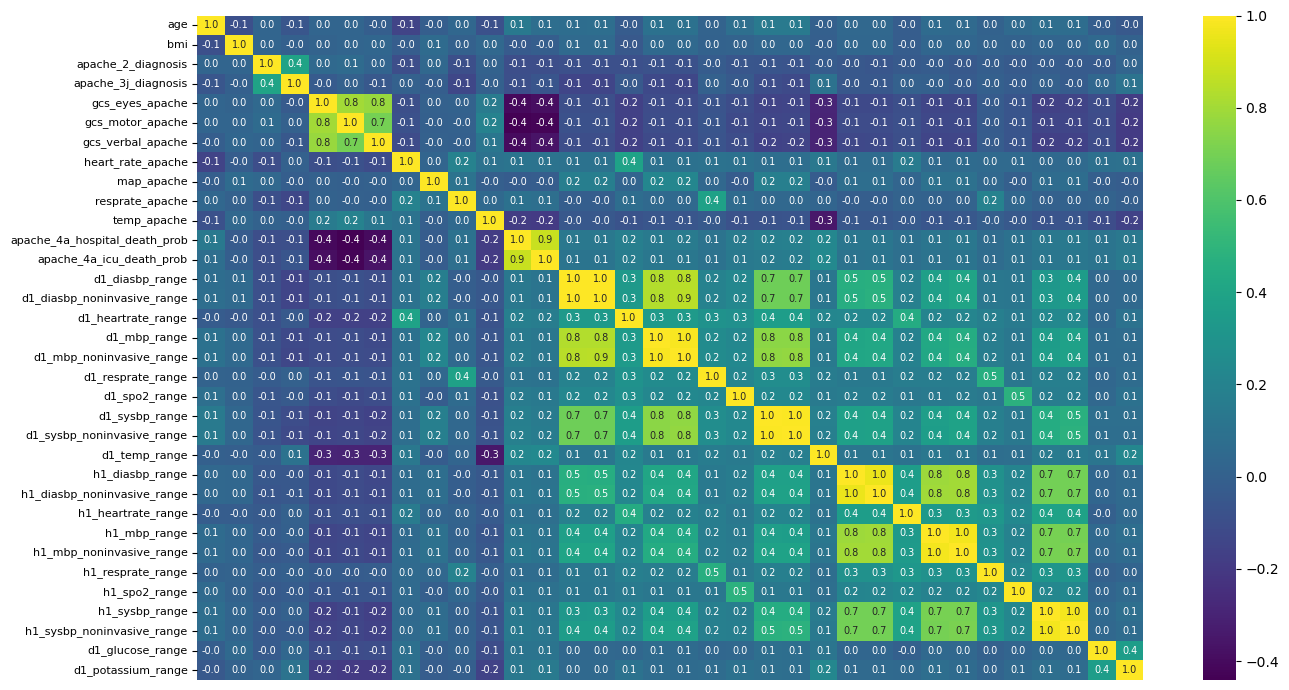

In [1046]:
corr_matrix = non_binary_columns.corr()
plt.figure(figsize=(14,7))
sb.heatmap(corr_matrix, annot=True, annot_kws={'fontsize' : 7}, cmap = 'viridis', fmt='.1f')
plt.xticks([])
plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

# Removing multicollinearity

Multicollinearity refers to the presence of highly correlated independent variables in a dataset. 

Q. why remove multicollinearity?

> 1. By removing redundant features, you simplify the model and make it easier to interpret.
> 2. Reducing multicollinearity helps the model focus on unique, independent features, which can improve predictive accuracy.
> 3. Removing one of the correlated features ensures fair representation of all variables.


In [1047]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.6)]
reduced_data = non_binary_columns.drop(columns=high_corr_columns)
all_reduced = pd.concat([reduced_data, Data_c[binary_columns]], axis = 1)

In [1048]:
all_reduced.columns

Index(['age', 'bmi', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'gcs_eyes_apache', 'heart_rate_apache', 'map_apache', 'resprate_apache',
       'temp_apache', 'apache_4a_hospital_death_prob', 'd1_diasbp_range',
       'd1_heartrate_range', 'd1_resprate_range', 'd1_spo2_range',
       'd1_temp_range', 'h1_diasbp_range', 'h1_heartrate_range',
       'h1_resprate_range', 'h1_spo2_range', 'd1_glucose_range',
       'd1_potassium_range', 'elective_surgery', 'ethnicity', 'gender',
       'apache_post_operative', 'arf_apache', 'gcs_unable_apache',
       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem', 'hospital_death'],
      dtype='object')

In [1049]:
binary_columns, non_binary_columns = separate_columns(all_reduced)

# Univariate Analysis
Its primary goal is to describe the distribution, central tendency, and variability of a single variable.
> `Purpose` Summarizes and provides insights into the characteristics of one variable without considering relationships with other variables.

> `Types`
> 1. Categorical Variables: Frequency distribution, mode, and visualization using bar charts or pie charts.
> 2. Numerical Variables: Central tendency (mean, median), dispersion (variance, standard deviation), and visualization using histograms or boxplots.

> `Common Techniques`
> 1. Descriptive statistics (mean, median, mode, variance, etc.).
> 2. Frequency counts and percentages for categorical data.
> 3. Visualization methods like histograms, bar plots, and boxplots.

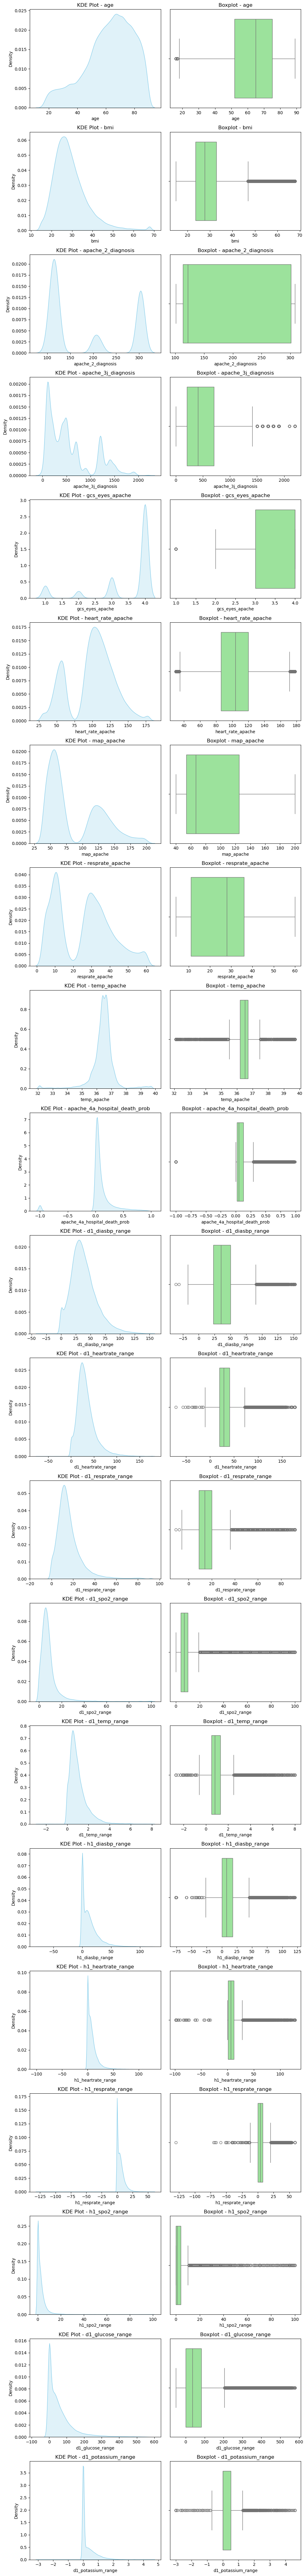

In [1050]:
numerical_data = non_binary_columns.select_dtypes(include='number').columns

num_cols = len(numerical_data)
fig, axes = plt.subplots(num_cols, 2, figsize=(10, 4 * num_cols))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(numerical_data):
    
    sb.kdeplot(data=non_binary_columns, x=col, ax=axes[i, 0], fill=True, color='skyblue')
    axes[i, 0].set_title(f'KDE Plot - {col}')
    

    sb.boxplot(data=non_binary_columns, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

# Outliers and Skewness

IQR (Interquartile Range) method to identify outliers and calculated the skewness to assess the distribution of the data.

`Outlier Detection Using IQR` Interquartile Range (IQR): Measures the spread of the middle 50% of data, defined as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
> - Outliers: Values are considered outliers if they fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
> - Objective: Identifying and potentially removing outliers ensures that the model is not skewed by extreme values.

`Skewness Calculation` Measures the asymmetry of the data distribution.
> - `Positive skew` Data is skewed to the right, with a longer right tail.
> - `Negative skew` Data is skewed to the left, with a longer left tail.
> - `Zero skew` Data is symmetric.
> - Objective: Understanding the skewness helps in identifying whether transformations (e.g., log transformation) are needed to normalize the data.

In [1052]:
outliers_list = []
skewness_list = []
col_list = []

def IQR_method(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

for col in non_binary_columns.columns:
    outliers_list.append(IQR_method(non_binary_columns[col]))
    skewness_list.append(non_binary_columns[col].skew())
    col_list.append(col)

defects_col = pd.DataFrame({
    "outliers" : outliers_list,
    "skewness" : skewness_list,
    "col" : col_list
})

defects_col

,outliers,skewness,col
0,170,-0.624474,age
1,3289,1.440833,bmi
2,0,0.507410,apache_2_diagnosis
3,4575,1.013397,apache_3j_diagnosis
4,8274,-1.684388,gcs_eyes_apache
5,1658,-0.267300,heart_rate_apache
6,0,0.698319,map_apache
7,0,0.258494,resprate_apache
8,8762,-0.966299,temp_apache
9,11372,-1.484047,apache_4a_hospital_death_prob


# Inferences from the Outliers and Skewness plots

The plots shows two key statistical visualizations that reveal several important patterns in what appears to be medical or healthcare data.

> - #### Outlier Analysis

> > The left plot shows the distribution of outliers across different medical parameters.
> > - Most variables have `relatively few` outliers `(less than 10,000)`
        `apache_4a_hospital_death_prob` and `temp_apache` show notably higher numbers of outliers
        `gcs_eyes_apache` and `apache_3j_diagnosis` also display elevated outlier counts
> > - The red dashed line indicates total values in the dataset.
> - #### Skewness Distribution

> > The right plot reveals the skewness characteristics of the variables:
> > - Most variables show positive skewness (values above 0)
        A `few variables` exhibit `negative skewness`, particularly in the middle section of the dataset
        `One variable` shows `extremely high positive skewness (around 8.0)`
        The red dashed lines likely indicate acceptable skewness below those thresholds.


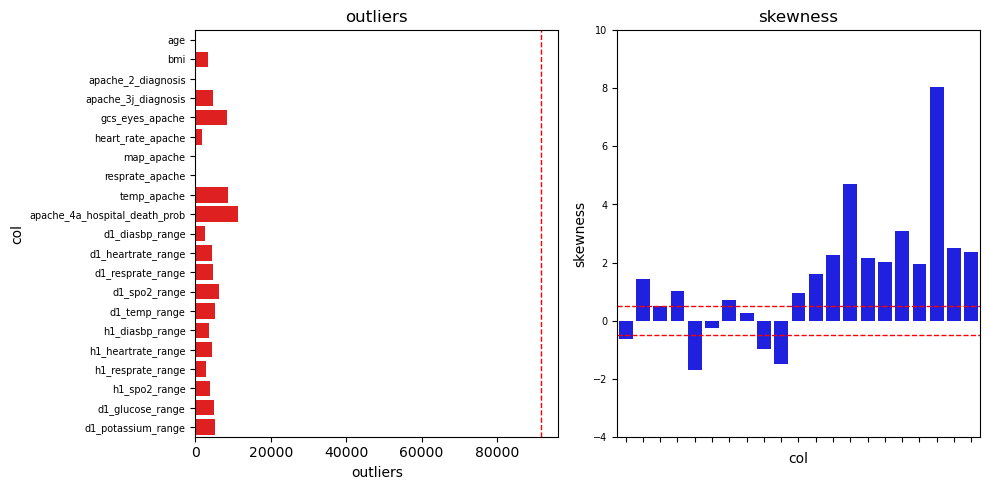

In [1053]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sb.barplot(x='outliers', y='col', data=defects_col, color='red', ax=ax[0])
sb.barplot(x='col', y='skewness', data=defects_col, color='blue', ax=ax[1])

ax[0].axvline(x=len(Data_c), color='red', linestyle='--', linewidth=1)
ax[1].axhline(y=0.5, color='red', linestyle='--', linewidth=1)
ax[1].axhline(y=-0.5, color='red', linestyle='--', linewidth=1)

ax[1].set_xticklabels([])

for axis, annotation in zip(ax, ['outliers', 'skewness']):
    axis.set_yticks(axis.get_yticks())
    axis.set_yticklabels(axis.get_yticklabels(), fontsize=7)
    axis.set_title(annotation)

plt.tight_layout()
plt.show()

# Categories Imbalance Analysis

**Highest Imbalance**
- **Ethnicity** shows the most severe distribution difference **(~120)**, indicating highly uneven representation of different ethnic groups in the dataset.
- **ARF Apache** and **GCS Unable Apache** also show substantial imbalances **(~100)**, suggesting significant disparities in these medical conditions.

**Moderate Imbalance**
- Medical conditions like **leukemia**, **lymphoma**, and **solid tumors with metastasis** show distribution differences around **80-90**.
- **Hospital death** and **Apache scoring systems** (2 and 3) display moderate imbalances in the **60-80 range**.

**Lower Imbalance**
- **Gender** shows the smallest distribution difference **(~10)**, indicating relatively balanced **gender** distribution.
- **Ventilated Apache** and **Diabetes Mellitus** show lower imbalances **(~40)**, suggesting more even distribution.

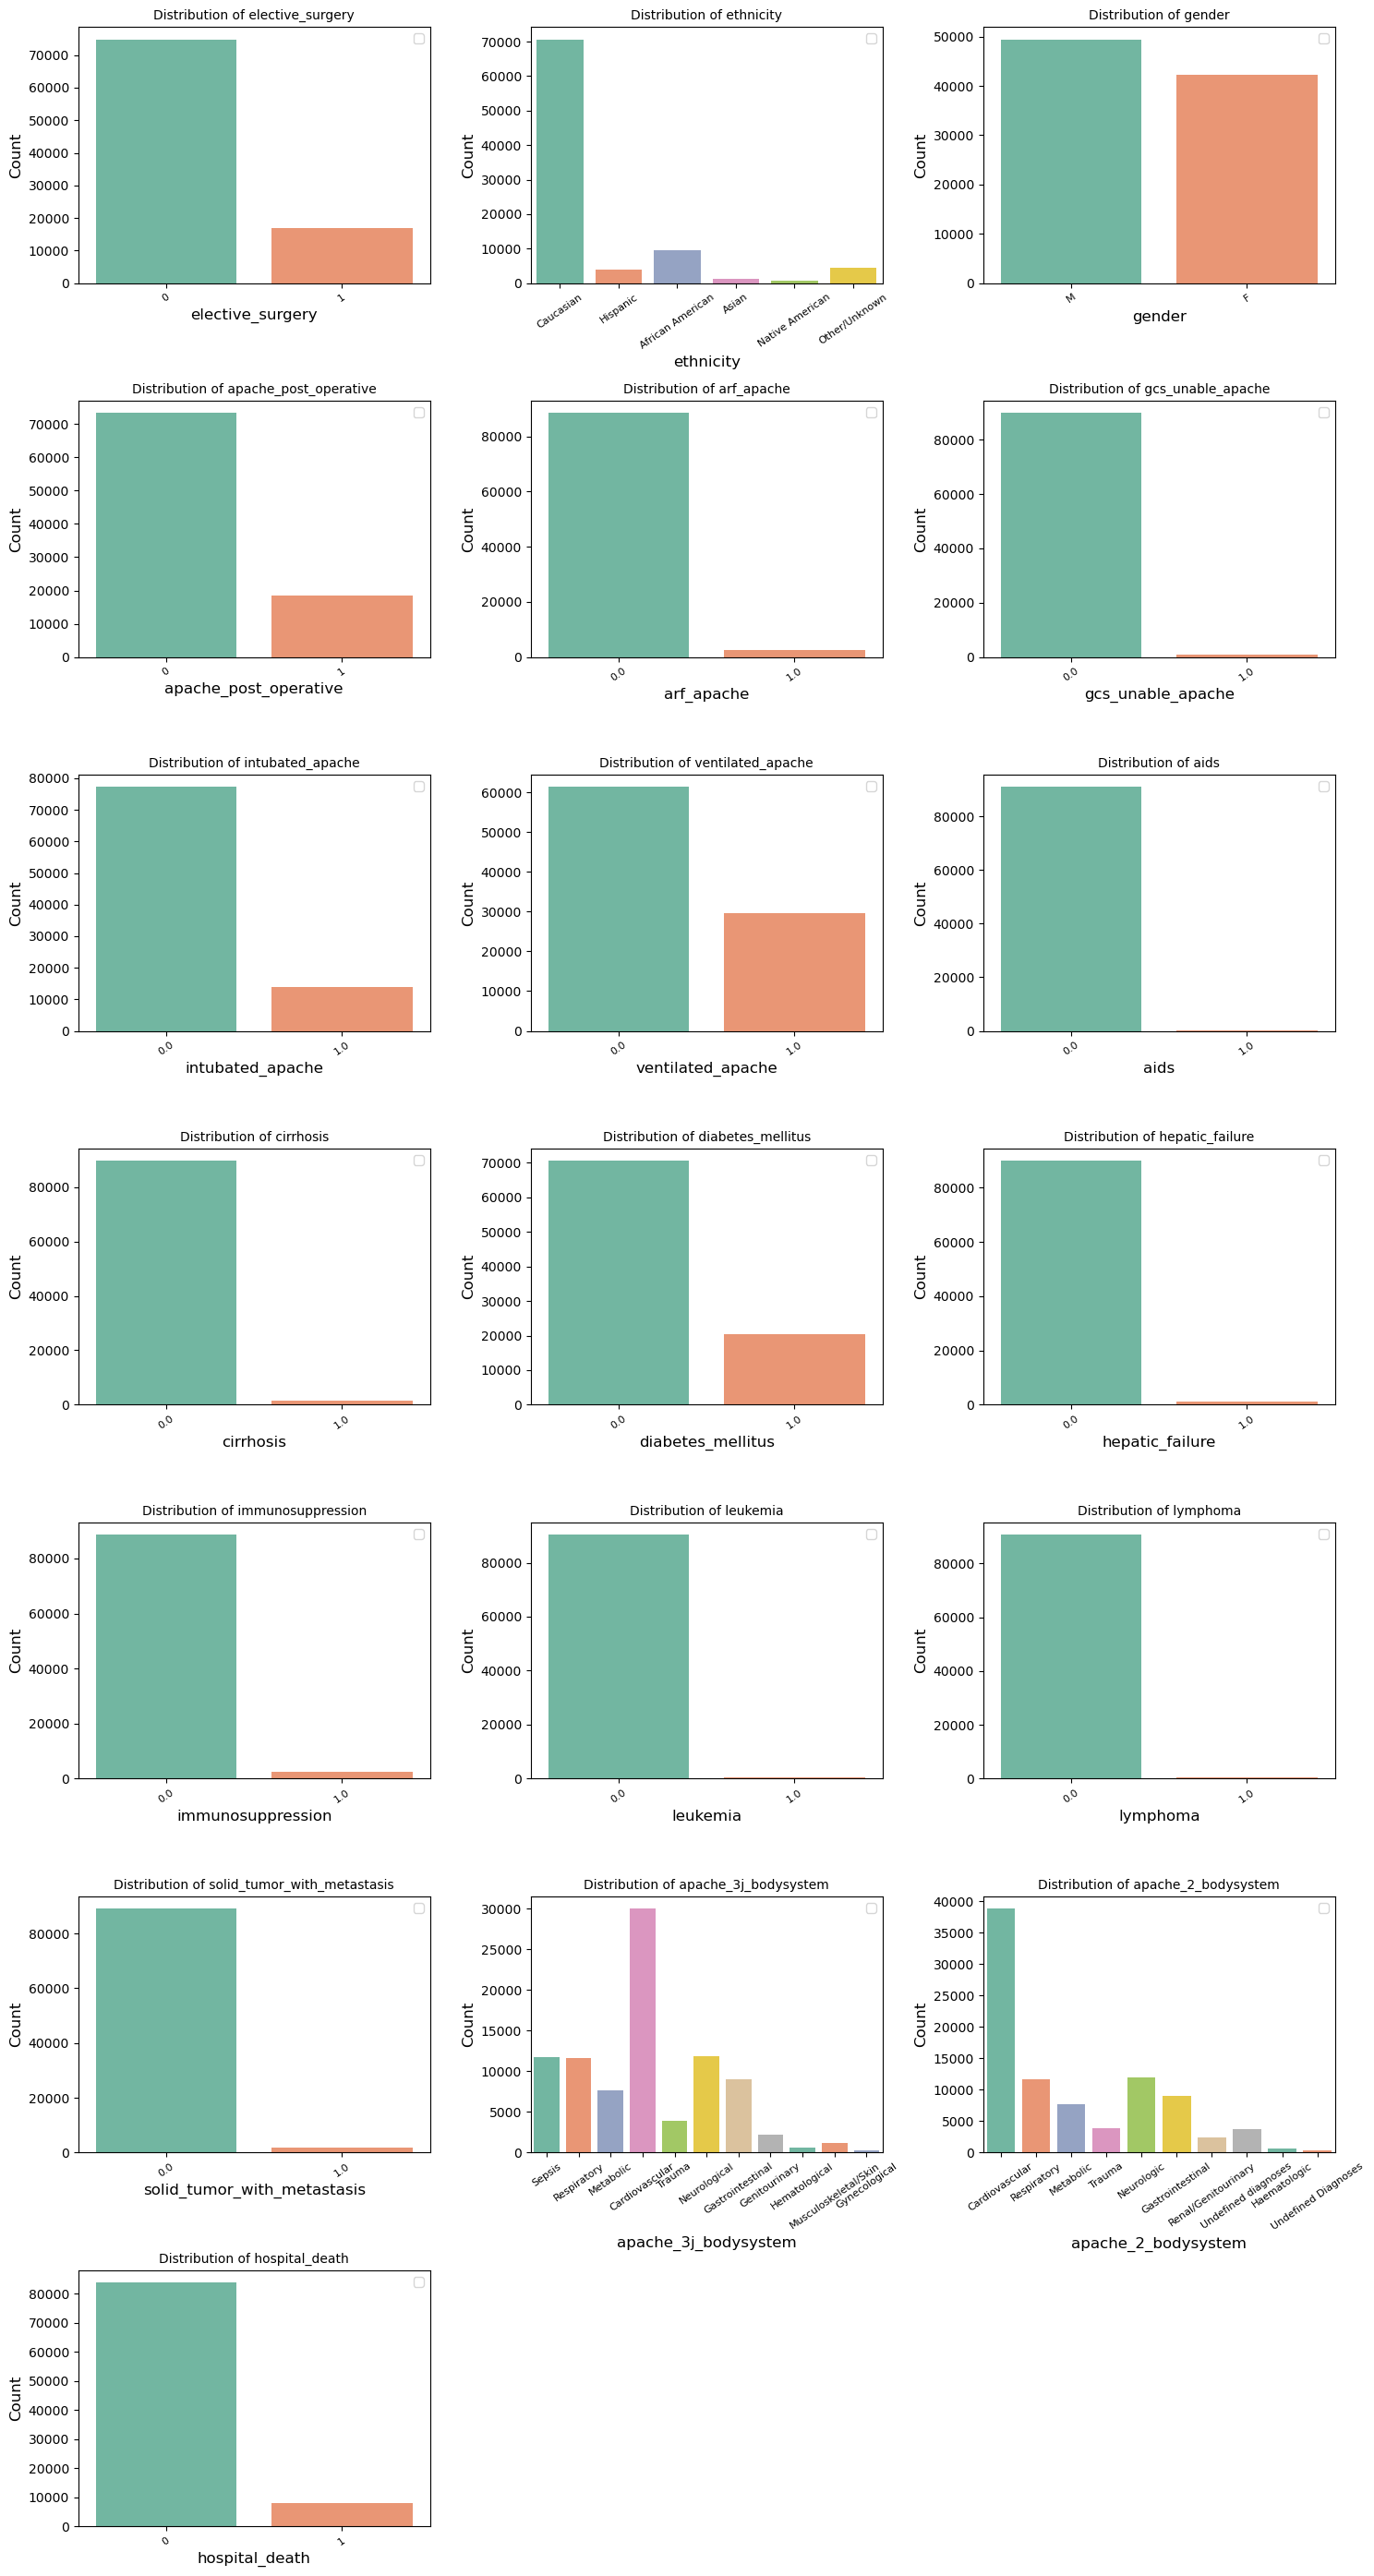

In [1054]:
categorical_data = all_reduced[binary_columns]

num_columns = len(categorical_data.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, categorical_column in enumerate(categorical_data.columns):
    sb.countplot(x=categorical_column, data=categorical_data, ax=axes[i], palette="Set2", hue=categorical_column)
    
    axes[i].set_title(f'Distribution of {categorical_column}', fontsize=10)
    axes[i].set_xlabel(categorical_column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    
    axes[i].tick_params(axis='x', labelsize=8, rotation = 35)
    axes[i].legend([])

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Actual vs Expected Distribution
- The purpose of calculating both of these distributions is to check the balance of categories within each categorical column in the dataset. If the actual distribution of categories deviates significantly from a uniform distribution, it might indicate imbalance or skewness in the data.
- A bar chart is shown having the total distribution difference for each categorical column, helping identify which columns are most imbalanced.

<Axes: xlabel='Distribution_Difference', ylabel='Column'>

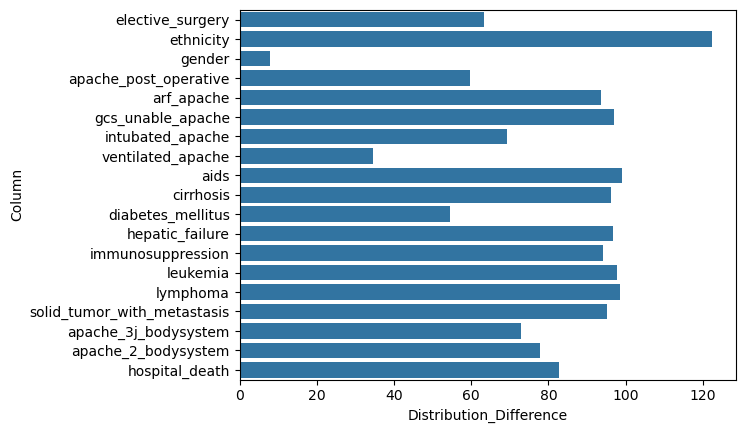

In [1055]:
distribution_difference = []
col_list = []

for categorical_column in categorical_data.columns:
    categories_per_col = categorical_data[categorical_column].value_counts()

    num_categories = len(categories_per_col)
    expected_category_distribution = 100 / num_categories
    
    actual_category_distribution = (categories_per_col / len(categorical_data)) * 100
    
    differences = np.abs(actual_category_distribution - expected_category_distribution)

    total_difference = differences.sum()
    col_list.append(categorical_column)
    distribution_difference.append(total_difference)

categorical_stats = pd.DataFrame({
    "Column" : col_list,
    "Distribution_Difference" : distribution_difference
})

sb.barplot(x = "Distribution_Difference", y = "Column", data = categorical_stats)

# Renaming the columns for better understanding

In [1056]:
new_columns = [
    'Patient_Age', 'Body_Mass_Index', 'APACHE_II_Diagnosis_Code', 
    'APACHE_III_Diagnosis_Code', 'GCS_Eye_Response', 'APACHE_Heart_Rate', 
    'APACHE_Mean_Arterial_Pressure', 'APACHE_Respiratory_Rate', 
    'APACHE_Temperature', 'APACHE_IV_Hospital_Death_Probability', 
    'Day1_Diastolic_Blood_Pressure_Range', 'Day1_Heart_Rate_Range', 
    'Day1_Respiratory_Rate_Range', 'Day1_Oxygen_Saturation_Range', 
    'Day1_Temperature_Range', 'Hour1_Diastolic_Blood_Pressure_Range', 
    'Hour1_Heart_Rate_Range', 'Hour1_Respiratory_Rate_Range', 
    'Hour1_Oxygen_Saturation_Range', 'Day1_Glucose_Level_Range', 
    'Day1_Potassium_Level_Range', 'Elective_Surgery_Status', 
    'Patient_Ethnicity', 'Patient_Gender', 'Postoperative_Status', 
    'Acute_Renal_Failure_Status', 'GCS_Score_Unavailable_Status', 
    'Intubation_Status', 'Mechanical_Ventilation_Status', 'AIDS_Status', 
    'Cirrhosis_Status', 'Diabetes_Status', 'Hepatic_Failure_Status', 
    'Immunosuppression_Status', 'Leukemia_Status', 'Lymphoma_Status', 
    'Solid_Tumor_Metastasis_Status', 'APACHE_III_Body_System_Code', 
    'APACHE_II_Body_System_Code', 'Hospital_Death_Outcome'
]

all_reduced.columns = new_columns
all_reduced

,Patient_Age,Body_Mass_Index,APACHE_II_Diagnosis_Code,APACHE_III_Diagnosis_Code,GCS_Eye_Response,APACHE_Heart_Rate,APACHE_Mean_Arterial_Pressure,APACHE_Respiratory_Rate,APACHE_Temperature,APACHE_IV_Hospital_Death_Probability,...,Cirrhosis_Status,Diabetes_Status,Hepatic_Failure_Status,Immunosuppression_Status,Leukemia_Status,Lymphoma_Status,Solid_Tumor_Metastasis_Status,APACHE_III_Body_System_Code,APACHE_II_Body_System_Code,Hospital_Death_Outcome
0,68.0,22.730000,113.0,502.01,3.0,118.0,40.0,36.0,39.3,0.10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,108.0,203.01,1.0,120.0,46.0,33.0,35.1,0.47,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,122.0,703.03,3.0,102.0,68.0,37.0,36.7,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,203.0,1206.03,4.0,114.0,60.0,4.0,34.8,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,119.0,601.01,NaN,60.0,103.0,16.0,36.7,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,113.0,501.06,4.0,115.0,48.0,9.0,36.6,0.12,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,113.0,501.05,4.0,100.0,62.0,33.0,37.4,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.0,27.236914,123.0,702.01,3.0,158.0,57.0,4.0,35.8,0.05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,NaN,23.297481,108.0,203.01,4.0,60.0,54.0,14.0,36.3,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [1057]:
general_info = [
    'Patient_Age', 'Body_Mass_Index', 'Patient_Ethnicity', 'Patient_Gender'
]

day1_vitals = [
    'Day1_Diastolic_Blood_Pressure_Range', 'Day1_Heart_Rate_Range', 
    'Day1_Respiratory_Rate_Range', 'Day1_Oxygen_Saturation_Range', 
    'Day1_Temperature_Range', 'Day1_Glucose_Level_Range', 'Day1_Potassium_Level_Range'
]

hour1_vitals = [
    'Hour1_Diastolic_Blood_Pressure_Range', 'Hour1_Heart_Rate_Range', 
    'Hour1_Respiratory_Rate_Range', 'Hour1_Oxygen_Saturation_Range'
]

procedures = [
    'Elective_Surgery_Status', 'Intubation_Status', 'Mechanical_Ventilation_Status'
]

comorbidities = [
    'AIDS_Status', 'Cirrhosis_Status', 'Diabetes_Status', 'Hepatic_Failure_Status', 
    'Immunosuppression_Status', 'Leukemia_Status', 'Lymphoma_Status', 
    'Solid_Tumor_Metastasis_Status'
]

outcome = ['Hospital_Death_Outcome']


# Comorbidities vs Hospital Deaths

The visualization presents hospital death outcomes across various comorbidities, revealing several important patterns:

**Overall Survival Rates**
Most patients across all conditions showed `high survival rates`, particularly those without comorbidities.

### **Disease-Specific Observations**

**Diabetes Impact**
Among all comorbidities shown, diabetes had the highest presence of cases with positive status, though survival rates remained favorable.

**Low Prevalence Conditions**
Several conditions showed very limited positive cases:
- Leukemia
- Lymphoma 
- Solid tumor metastasis
- Hepatic failure

**AIDS and Immunosuppression**
Both conditions displayed similar patterns with relatively few positive cases but maintained good survival rates when present.

## Statistical Distribution

| Condition | Pattern |
|-----------|---------|
| Diabetes | Highest positive case count, good survival ratio |
| Cirrhosis | Low positive case count, moderate mortality |
| AIDS | Very few positive cases, high survival rate |
| Hepatic Failure | Minimal positive cases, low mortality |

The diabetes category stands out with its higher prevalence, suggesting it might be the most common comorbidity among the hospital population studied.

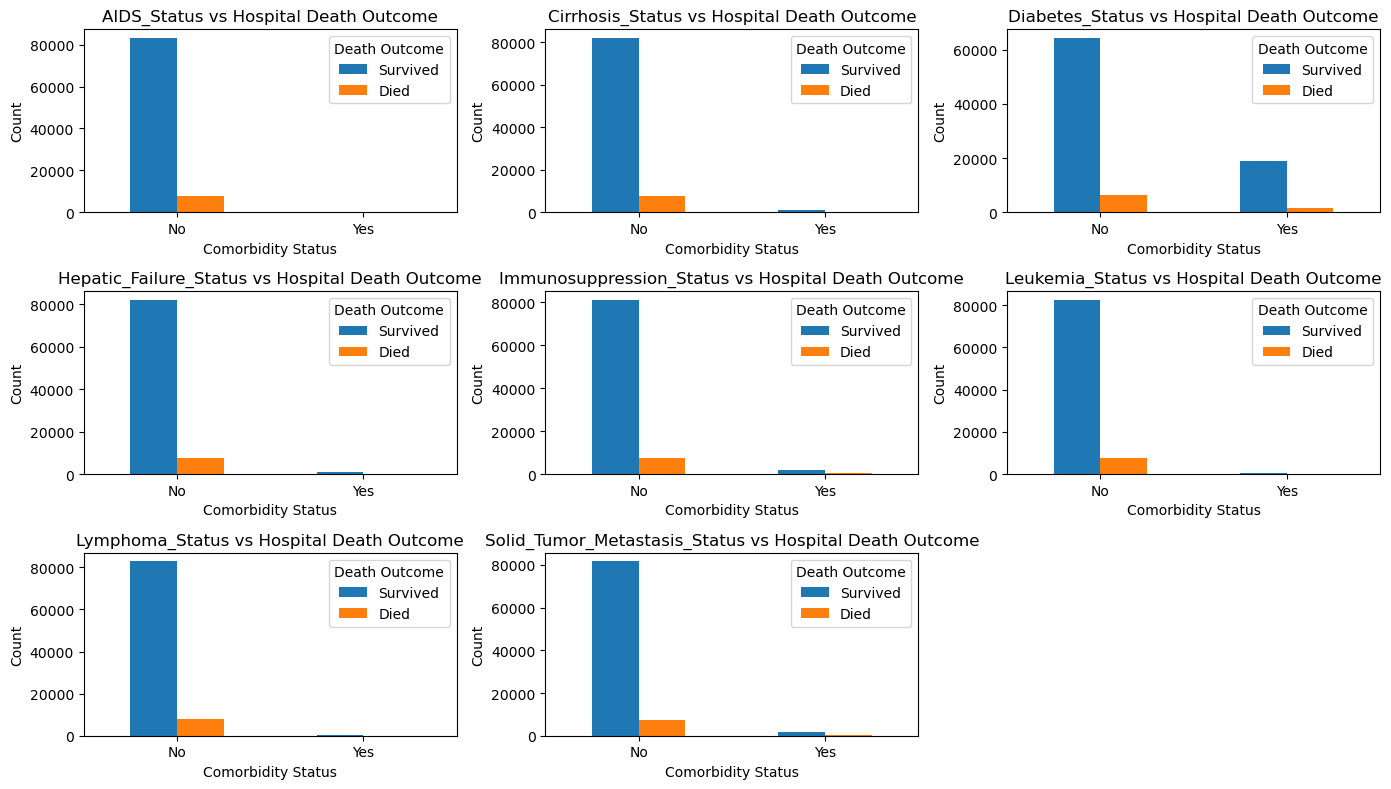

In [1058]:
comorbidity_columns = [
    'AIDS_Status', 'Cirrhosis_Status', 'Diabetes_Status', 'Hepatic_Failure_Status', 
    'Immunosuppression_Status', 'Leukemia_Status', 'Lymphoma_Status', 
    'Solid_Tumor_Metastasis_Status'
]

plt.figure(figsize=(14, 8))

for i, comorbidity in enumerate(comorbidity_columns):
    plt.subplot(3, 3, i + 1)
    
    outcome_comorbidity = pd.crosstab(all_reduced[comorbidity], all_reduced['Hospital_Death_Outcome'])
    
    outcome_comorbidity.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
    
    plt.title(f'{comorbidity} vs Hospital Death Outcome')
    plt.xlabel('Comorbidity Status')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
    plt.legend(title='Death Outcome', labels=['Survived', 'Died'])

plt.tight_layout()
plt.show()


## Distribution Patterns
- Most graphs show **bimodal distributions** with distinct peaks for survivors and non-survivors
- The orange lines represent "Survived" outcomes while the blue lines represent "Died" outcomes
- The x-axis consistently shows "Vital Sign Range" across all graphs

## Key Patterns

**Vital Sign Distributions**
- A clear separation exists between survival (blue) and death (orange) outcomes across all vital signs
- The patterns are consistent between Day 1 and Hour 1 measurements, suggesting early predictive value

**Individual Vital Signs**

**Blood Pressure**
- Survivors consistently show higher diastolic blood pressure ranges
- Deceased patients cluster in lower blood pressure ranges
- Minimal overlap between outcomes suggests strong predictive value

**Heart Rate**
- Deceased patients tend toward more extreme values (both high and low)
- Survivors show more moderate, centralized heart rate ranges
- Clear bimodal distribution for survival outcomes

**Respiratory Rate**
- Strong separation between outcomes
- Higher respiratory rates correlate with mortality
- Survivors maintain more normal respiratory ranges

**Oxygen Saturation**
- Most distinctive separation among all vitals
- Higher oxygen saturation strongly associates with survival
- Lower values show strong correlation with mortality

**Additional Day 1 Measurements**

**Temperature**
- Shows bimodal distribution for both outcomes
- More overlap between survival and death outcomes
- Less predictive than other vital signs

**Glucose Levels**
- Clear separation between outcomes
- Survivors tend toward higher normalized ranges
- Deceased patients cluster in lower ranges

**Potassium Levels**
- Distinct peaks for both outcomes
- Some overlap in middle ranges
- Abnormal values in either direction associate with mortality

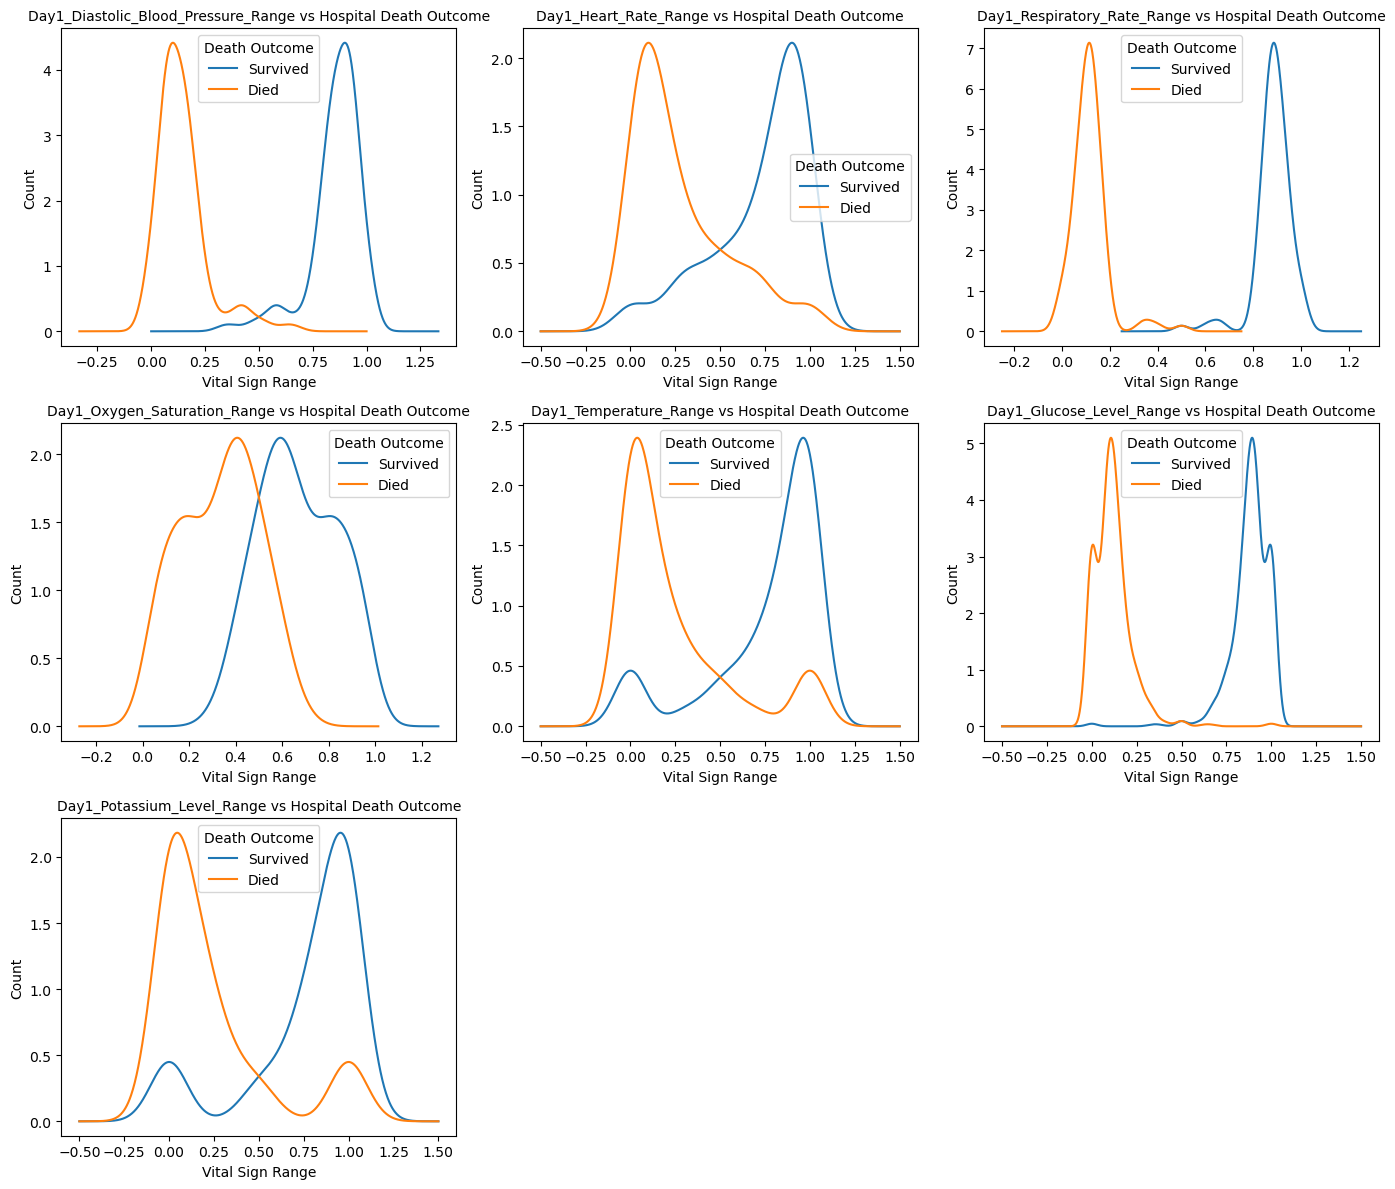

<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

In [1059]:
day1_vitals = [
    'Day1_Diastolic_Blood_Pressure_Range', 'Day1_Heart_Rate_Range', 
    'Day1_Respiratory_Rate_Range', 'Day1_Oxygen_Saturation_Range', 
    'Day1_Temperature_Range', 'Day1_Glucose_Level_Range', 'Day1_Potassium_Level_Range'
]

plt.figure(figsize=(14, 12))

for i, vital in enumerate(day1_vitals):
    plt.subplot(3, 3, i + 1)
    
    outcome_vital = pd.crosstab(all_reduced[vital], all_reduced['Hospital_Death_Outcome'])

    outcome_vital_scaled = outcome_vital.div(outcome_vital.sum(axis=1), axis=0)
    
    outcome_vital_scaled.plot(kind='kde', stacked=False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
    
    plt.title(f'{vital} vs Hospital Death Outcome', fontsize = 10)
    plt.xlabel('Vital Sign Range')
    plt.ylabel('Count')
    plt.legend(title='Death Outcome', labels=['Survived', 'Died'])

plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 12))
    

## Key Observations

**Diastolic Blood Pressure**
The orange curve (deceased patients) peaks at lower blood pressure values, while the blue curve (survivors) peaks at higher values, suggesting that lower diastolic blood pressure in the first hour may be associated with higher mortality risk.

**Heart Rate**
Similar to blood pressure, there's a clear separation between outcomes. Deceased patients tend to have more extreme heart rate values (either very high or very low), while survivors cluster in a more moderate range.

**Respiratory Rate**
The distribution shows a marked separation, with deceased patients showing higher respiratory rates compared to survivors. This suggests that abnormally high respiratory rates in the first hour may indicate poor prognosis.

**Oxygen Saturation**
This shows perhaps the most striking pattern among all vitals. Survivors (blue) tend to have higher oxygen saturation levels, while deceased patients (orange) show lower values. The overlap between curves is minimal, suggesting oxygen saturation might be a strong predictor of outcome.

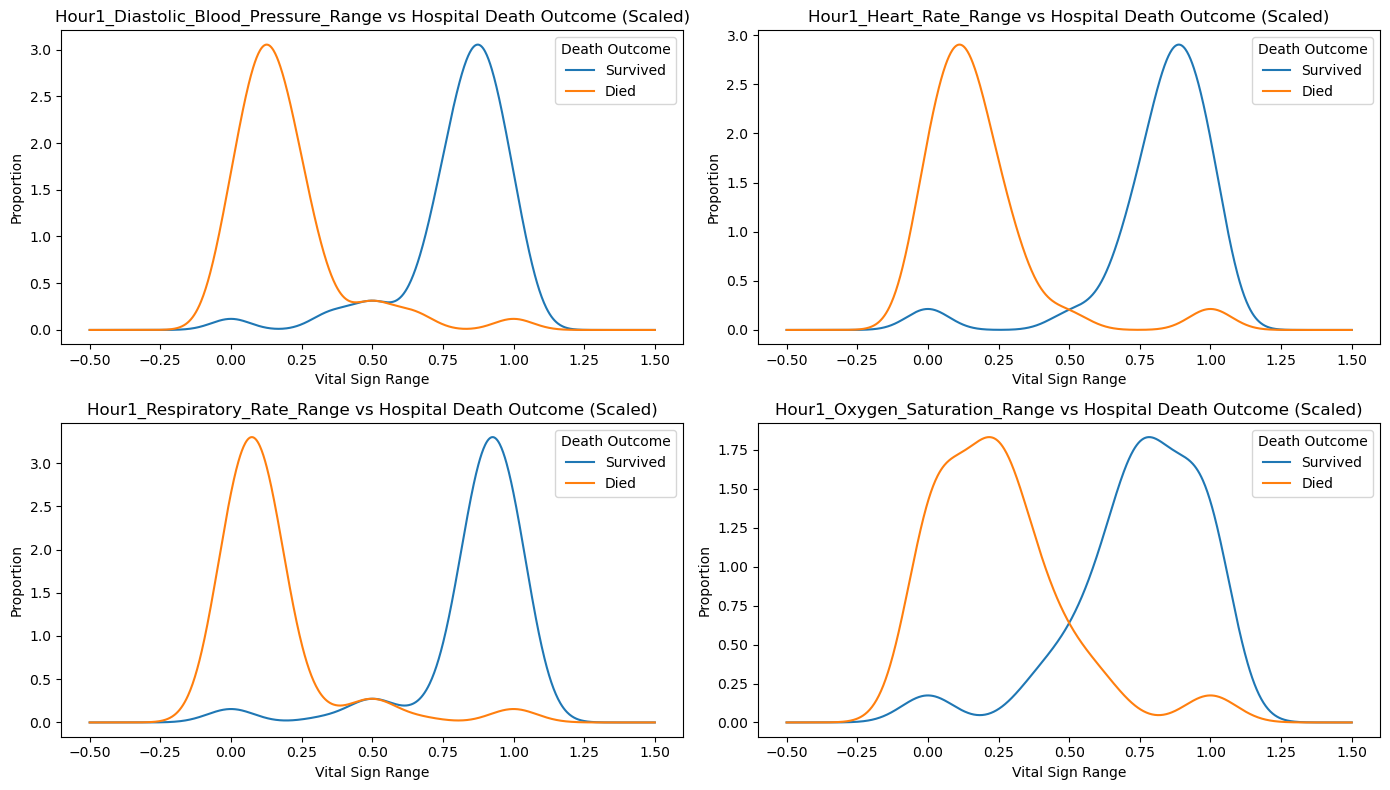

In [1060]:
hour1_vitals = [
    'Hour1_Diastolic_Blood_Pressure_Range', 'Hour1_Heart_Rate_Range', 
    'Hour1_Respiratory_Rate_Range', 'Hour1_Oxygen_Saturation_Range'
]

plt.figure(figsize=(14, 8))

for i, vital in enumerate(hour1_vitals):
    plt.subplot(2, 2, i + 1)
    
    outcome_vital = pd.crosstab(all_reduced[vital], all_reduced['Hospital_Death_Outcome'])
    
    outcome_vital_scaled = outcome_vital.div(outcome_vital.sum(axis=1), axis=0)
    
    outcome_vital_scaled.plot(kind='kde', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
    
    plt.title(f'{vital} vs Hospital Death Outcome (Scaled)')
    plt.xlabel('Vital Sign Range')
    plt.ylabel('Proportion')
    plt.legend(title='Death Outcome', labels=['Survived', 'Died'])

plt.tight_layout()
plt.show()


## Key Demographic Patterns in Hospital Outcomes

The visualization reveals several important patterns in hospital death outcomes across different demographic factors:

**Age Impact**
The survival rates remain consistently high across all age groups, though there is a slight increase in mortality rates in higher age brackets.

**BMI Relationship**
Body Mass Index shows minimal influence on mortality outcomes, with consistently high survival rates maintained across different BMI categories.

**Ethnic Disparities**
Among ethnic groups, African American and Native American populations show marginally higher mortality rates compared to other ethnicities.

**Gender Distribution**
The mortality patterns between genders show minimal variation, though males demonstrate a slightly elevated death rate compared to females.

## Overall Assessment
The data suggests that while demographic factors do influence hospital outcomes, the overall survival rates remain high across most demographic categories. The most notable variations appear in ethnic distribution and age-related outcomes, while BMI and gender show less pronounced effects on mortality rates.

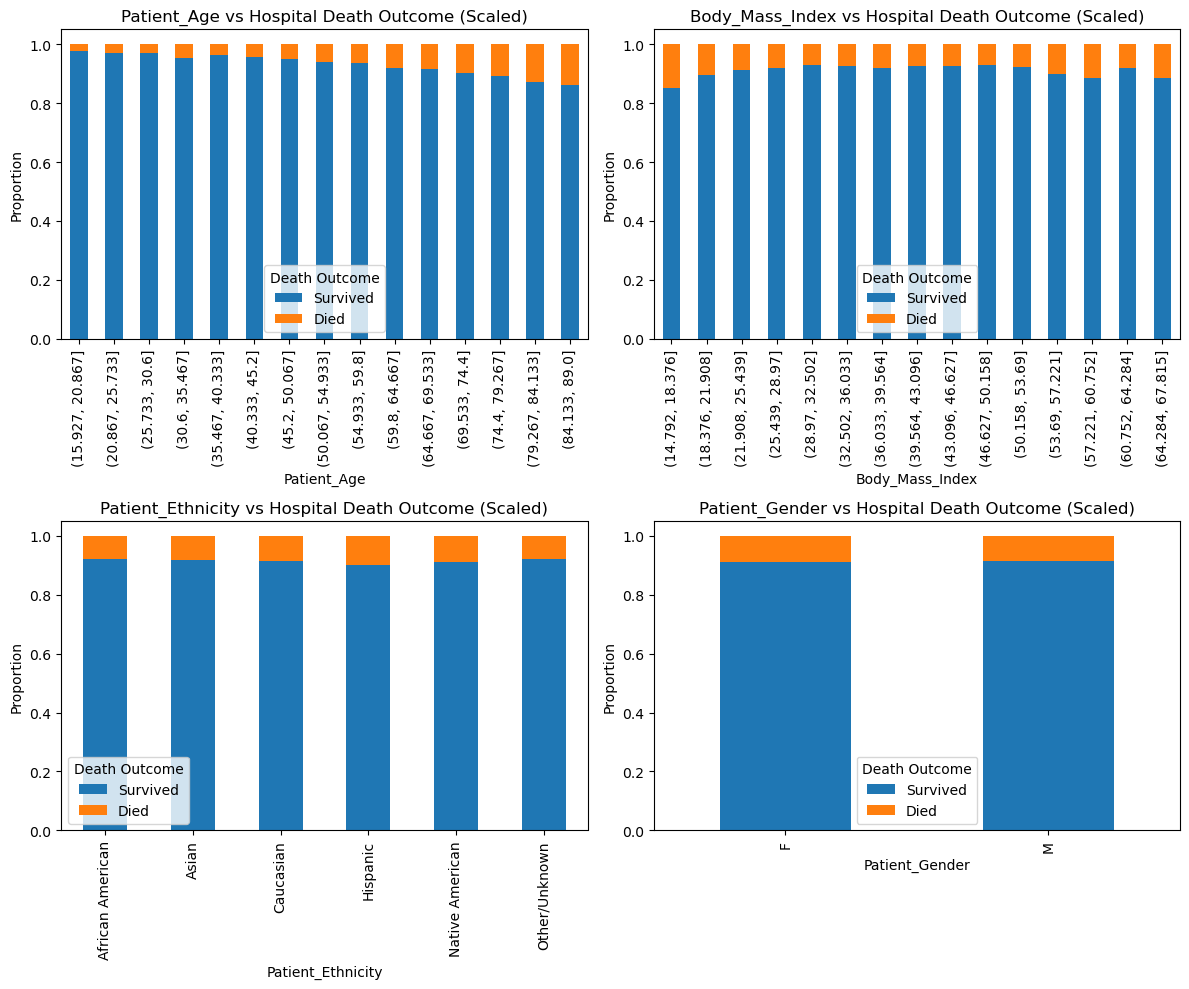

In [1061]:
plt.figure(figsize=(12, 10))

for i, info in enumerate(general_info):
    plt.subplot(2, 2, i + 1)
    
    if all_reduced[info].dtype == 'object' or all_reduced[info].dtype.name == 'category':
        outcome_info = pd.crosstab(all_reduced[info], all_reduced['Hospital_Death_Outcome'])
    else:
        bins = pd.cut(all_reduced[info], bins=15)
        outcome_info = pd.crosstab(bins, all_reduced['Hospital_Death_Outcome'])
    
    outcome_info_scaled = outcome_info.div(outcome_info.sum(axis=1), axis=0)
    
    outcome_info_scaled.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
    
    plt.title(f'{info} vs Hospital Death Outcome (Scaled)')
    plt.xlabel(info)
    plt.ylabel('Proportion')
    plt.legend(title='Death Outcome', labels=['Survived', 'Died'])

plt.tight_layout()
plt.show()
